# Module 2 - Decision Trees

In this module we explore especifically the Decision Tree. By the end of this module, you should be able to:

* Understand how a decision tree works for classification
* Describe the process of building a decision tree
* Use the main python libraries to build a decision tree 

## What is a Decision Tree?

## How a decision tree works?

In [1]:
# Load our packages

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data

For this algorithm, we will use the final_grades dataset. In this dataset, we are exploring the academic performance of secondary education students of two Portuguese schools. You can find more details about this dataset in the following [link](https://archive.ics.uci.edu/dataset/320/student+performance). 

In [22]:
# We load our data
df = pd.read_csv("datasets/final_grades.csv")
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,0,0,0,18,1,0,0,4,4,0,...,3,4,1,1,3,6,5,6,6,F
1,1,0,0,17,1,0,1,1,1,0,...,3,3,1,1,3,4,5,5,6,F
2,2,0,0,15,1,1,1,1,1,0,...,3,2,2,3,3,10,7,8,10,E
3,3,0,0,15,1,0,1,4,2,1,...,2,2,1,1,5,2,15,14,15,B
4,4,0,0,16,1,0,1,3,3,2,...,3,2,1,2,5,4,6,10,10,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,1,1,20,1,1,0,2,2,3,...,5,4,4,5,4,11,9,9,9,F
391,391,1,1,17,1,1,1,3,1,3,...,4,5,3,4,2,3,14,16,16,B
392,392,1,1,21,0,0,1,1,1,2,...,5,3,3,3,3,3,10,8,7,F
393,393,1,1,18,0,1,1,3,2,3,...,4,1,3,4,5,0,11,12,10,E


As we see, this dataset contains multiple features for each student, as well as the final grade. Our goal is gonna be to predict the final grade for each student based on the set of features.

In [23]:
# We start by encoding our grades, as we need the grades to be numeric. 
le = LabelEncoder()
df['final_grade'] = le.fit_transform(df['final_grade'])

In [24]:
# Create our training and testing data. We use a 20% testing ratio
X = df.drop(columns=['G3', 'final_grade', 'Unnamed: 0'])
y = df['final_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [25]:
# Create our classifier object and train our tree
tree = DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
tree

DecisionTreeClassifier(max_leaf_nodes=32, random_state=0)

In [26]:
# Fit our tree with the training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=32, random_state=0)

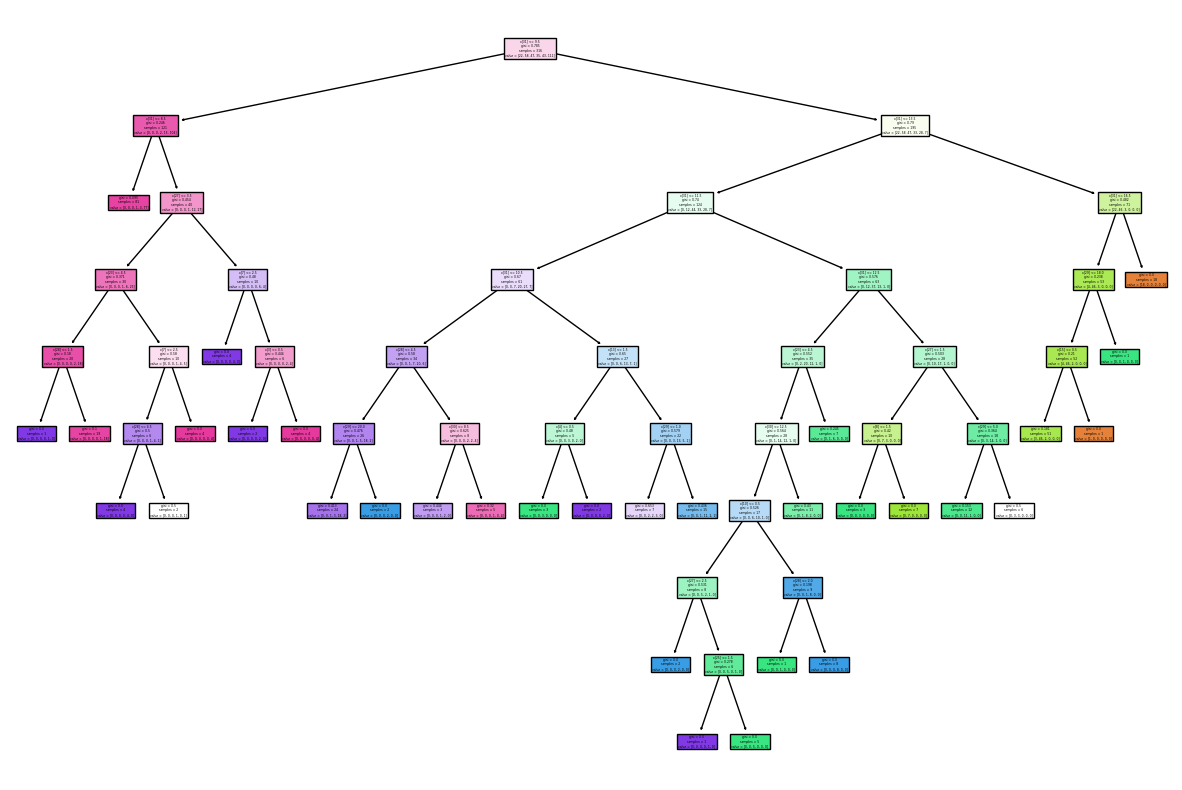

In [27]:
# Lets visualize our tree
plt.figure(figsize=(15,10))
plot_tree(tree, filled=True)
plt.show()

In [28]:
# Now let's make predictions with our tree and get the accuracy
predictions = tree.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.6962025316455697

## Random Forest

One of the problems of the decision tree is tend to overfit. Therefore, a more generalizable version of a decision tree can be found by the use of the random forest algorithm. 